In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from scipy import stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [6]:
mc = pd.read_csv('mc.csv')

In [7]:
mc.head()
mc.session.value_counts()

Afternoon    228621
Morning      187943
Evening      172637
Night        139967
Name: session, dtype: int64

In [8]:
mc.dtypes

Unnamed: 0             int64
CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
SUSP_AGE_GROUP        object
SUSP_SEX              object
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
year                 float64
month                float64
session               object
session_to            object
diff                  object
diff_min             float64
dtype: object

In [9]:
mc.dropna(subset=['CMPLNT_FR_TM'], inplace = True)

In [10]:
mc.dropna(subset=['PATROL_BORO'], inplace = True)

In [11]:
from datetime import datetime

In [12]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

# Label Encoding columns (need to do this for the target class too)

In [16]:
mc['RPT_DT'] = pd.to_datetime(mc['RPT_DT'])

In [17]:
mc['reported_dow'] = mc['RPT_DT'].dt.dayofweek

In [18]:
target_transform = LabelEncoder()
mc['session'] = target_transform.fit_transform(mc['session'])
mc.iloc[:,10:]

,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,SUSP_AGE_GROUP,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,session,session_to,diff,diff_min,reported_dow
0,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,18-24,WHITE HISPANIC,F,2018.0,6.0,1,Evening,0 days 00:01:00,1.0,6
1,388.0,"ROBBERY,RESIDENTIAL COMMON AREA",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,<18,WHITE HISPANIC,M,2018.0,11.0,0,Afternoon,0 days 00:10:00,10.0,6
2,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,<18,...,<18,WHITE HISPANIC,F,2018.0,5.0,0,Afternoon,0 days 03:00:00,180.0,0
3,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,18-24,...,65+,BLACK,M,2018.0,12.0,0,Afternoon,0 days 00:15:00,15.0,5
4,175.0,"SEXUAL ABUSE 3,2",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,18-24,BLACK,F,2018.0,9.0,0,Afternoon,0 days 00:15:00,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729163,198.0,CRIMINAL CONTEMPT 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,45-64,...,25-44,WHITE,F,2018.0,10.0,2,Morning,0 days 00:53:00,53.0,3
729164,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,45-64,...,45-64,WHITE,F,2018.0,5.0,2,Morning,0 days 00:10:00,10.0,1
729165,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,45-64,WHITE,F,2018.0,5.0,2,Morning,0 days 00:55:00,55.0,1
729166,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,GAS STATION,N.Y. POLICE DEPT,0.0,18-24,...,45-64,BLACK HISPANIC,M,2018.0,1.0,0,Afternoon,0 days 00:08:00,8.0,2


In [19]:
mc.columns

Index(['Unnamed: 0', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC',
       'JURISDICTION_CODE', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude',
       'Longitude', 'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'year', 'month', 'session', 'session_to', 'diff', 'diff_min',
       'reported_dow'],
      dtype='object')

In [20]:
mc.shape

(729160, 35)

In [21]:
columns_to_keep = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC' , 'LAW_CAT_CD', 'BORO_NM', 
                   'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude', 'Longitude',
                  'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year', 
                  'month', 'session', 'session_to', 'diff', 'diff_min' , 'reported_dow']

categorical = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC', 'LAW_CAT_CD', 'BORO_NM', 
                'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX','PATROL_BORO', 'VIC_AGE_GROUP',
               'VIC_RACE', 'VIC_SEX', 'reported_dow', 'session_to']

numerical = ['year', 'month', 'session','diff_min']

In [22]:
#changed sample size to 500,000 to see how the recall score changes 

mcsample = mc.sample(500000)

In [23]:
#drop target from the dataset 
#only include columns that we want in the pipeline

X = mcsample[columns_to_keep]

y = mcsample['CRM_ATPT_CPTD_CD']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
## baseline Model - K NeighborsClassifier #non-parametric model


numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



KNN_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       KNeighborsClassifier())])  #where to change the model
KNN_pipe

KNN_pipe.fit(X_train,y_train)
KNN_pipe.score(X_test, y_test)

In [25]:
#log reg pipeline

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



logreg_pipe = Pipeline([('preprocess', ct),
                ('model1', LogisticRegression(max_iter =10000))]) #where to change the model
logreg_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('model1', LogisticRegression(max_iter=10000))])

In [26]:
logreg_pipe.fit(X_train,y_train)  
logreg_pipe.score(X_test, y_test)

0.9876060606060606

In [27]:
#classification metrics

predicted = logreg_pipe.predict(X_test)
predicted 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.89      0.06      0.12      2166
   COMPLETED       0.99      1.00      0.99    162834

    accuracy                           0.99    165000
   macro avg       0.94      0.53      0.56    165000
weighted avg       0.99      0.99      0.98    165000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


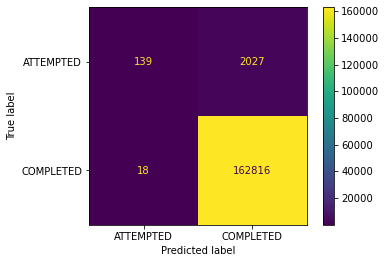

In [28]:
plot_confusion_matrix(logreg_pipe, X_test, y_test)

In [52]:
np.logspace(-4, 4, 50)

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [55]:
## logistic regression grid search 

logreg_params = {'model1__C' : np.logspace(-4, 4, 50),
                 'model1__penalty':['l1', 'l2']}

logreg_cv = GridSearchCV(estimator = logreg_pipe, param_grid = logreg_params, cv = 5)
logreg_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [30]:
# Random Forest Classifier with Random OverSampling 

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

#Random Forest - with oversampling 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe = Pipeline([('preprocess', ct),('ros', RandomOverSampler()),  #tuning the model
                      ('model',
                       RandomForestClassifier())])  #change the model
RF_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('ros', RandomOverSampler()),
                ('model', RandomForestClassifier())])

In [31]:
RF_pipe.fit(X_train,y_train)
RF_pipe.score(X_test, y_test)

0.9872848484848484

In [32]:
#classification metrics for oversampler

predicted = RF_pipe.predict(X_test)
predicted 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.60      0.10      0.16      2166
   COMPLETED       0.99      1.00      0.99    162834

    accuracy                           0.99    165000
   macro avg       0.79      0.55      0.58    165000
weighted avg       0.98      0.99      0.98    165000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


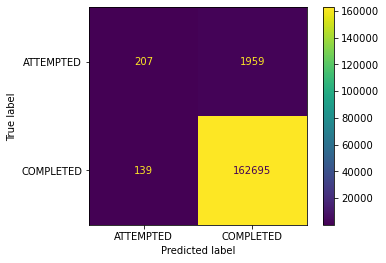

In [33]:
plot_confusion_matrix(RF_pipe, X_test, y_test)

In [34]:
# Random Forest Classifier with SMOTE 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe_SMOTE = Pipeline([('preprocess', ct),('smote', SMOTE()),
                       ('model', RandomForestClassifier())])  #where you change the model


RF_pipe_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('smote', SMOTE()), ('model', RandomForestClassifier())])

In [35]:
RF_pipe_SMOTE.fit(X_train,y_train)
RF_pipe_SMOTE.score(X_test,y_test)

0.9873878787878788

In [36]:
#classification metrics

predicted = RF_pipe_SMOTE.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.66      0.08      0.14      2166
   COMPLETED       0.99      1.00      0.99    162834

    accuracy                           0.99    165000
   macro avg       0.82      0.54      0.57    165000
weighted avg       0.98      0.99      0.98    165000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


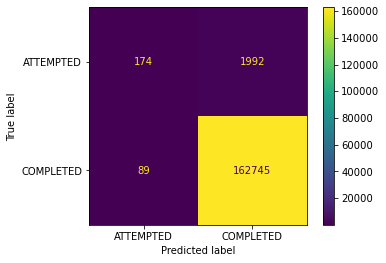

In [37]:
plot_confusion_matrix(RF_pipe_SMOTE, X_test, y_test)

In [38]:
RF_pipe_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('smote', SMOTE()), ('model', RandomForestClassifier())])

In [39]:
RF_pipe_SMOTE.named_steps['model']

RandomForestClassifier()

In [40]:
#tuning_pipe.get_feature_names()
#could use any pipeline

onehot_cols = RF_pipe_SMOTE.named_steps['preprocess'].named_transformers_['nominalpipe'].named_steps['onehotenc'].get_feature_names_out()

In [41]:
#feature names out 

feature_importances = (RF_pipe_SMOTE.steps[2][1].feature_importances_)
pd.DataFrame(list(zip(onehot_cols, feature_importances))).sort_values(by = 1, ascending = False)

,0,1
424,LAW_CAT_CD_FELONY,0.045415
80,KY_CD_106,0.022519
165,"PD_DESC_ASSAULT 2,1,UNCLASSIFIED",0.021801
152,OFNS_DESC_ROBBERY,0.020540
425,LAW_CAT_CD_MISDEMEANOR,0.019742
...,...,...
409,PD_DESC_THEFT OF SERVICES- CABLE TV SE,0.000000
344,"PD_DESC_PROSTITUTION, PATRONIZING 4, 3",0.000000
418,PD_DESC_USE OF A CHILD IN A SEXUAL PER,0.000000
221,"PD_DESC_FALSE REPORT 1,FIRE",0.000000


In [ ]:
#random forest grid search 

rf_params = {'model__n_estimators': [50, 100, 200, 500],
             'model__min_samples_leaf': [1,3,5,7]}
rf_cv = GridSearchCV(estimator = RF_pipe_SMOTE, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

In [70]:
rf_cv.best_score_   #gives score on best estimation for these numbers 

NameError: name 'rf_cv' is not defined

In [71]:
rf_cv.best_params_  #shows you the numbers that work best for the grid search 

NameError: name 'rf_cv' is not defined

In [72]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

#train the new pipeline on this param 

NameError: name 'rf_cv' is not defined

In [42]:
#Random Forest - with undersampling 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe_under = Pipeline([('preprocess', ct),('ros', RandomUnderSampler()),  #tuning the model
                      ('model',
                       RandomForestClassifier())])  #change the model
RF_pipe_under

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('ros', RandomUnderSampler()),
                ('model', RandomForestClassifier())])

In [43]:
RF_pipe_under.fit(X_train,y_train)
RF_pipe_under.score(X_test, y_test)

0.8386727272727272

In [44]:
#classification metrics

predicted = RF_pipe_under.predict(X_test)
predicted 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.06      0.77      0.11      2166
   COMPLETED       1.00      0.84      0.91    162834

    accuracy                           0.84    165000
   macro avg       0.53      0.81      0.51    165000
weighted avg       0.98      0.84      0.90    165000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


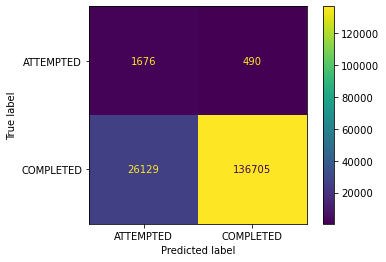

In [45]:
plot_confusion_matrix(RF_pipe_under, X_test, y_test)

In [74]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

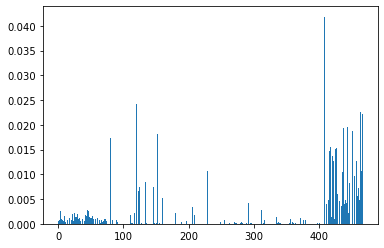

In [75]:
# plot feature importance
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.show()